In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, f1_score,accuracy_score ,precision_recall_curve, average_precision_score

In [4]:
path_model = 'Models/YOUR_MODEL_NAME/'
df = pd.read_csv(path_model+'93.7_predictions.csv')

# set up filters for datasets
high_quality_filter = df['total_votes_received']>2
ultra_quality_filter = df['total_votes_received']>=8
mode_filter = df['Mode']=='Test'
frac_filter = (df['fraction_of_yes'] >6/8) | (df['fraction_of_yes'] < 2/8)

# load samples as defined in spikenet paper
AUC_df = df[ultra_quality_filter & mode_filter & frac_filter]
labels = AUC_df.fraction_of_yes.values.round(0).astype(int)
preds = AUC_df.preds
# calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(labels, preds)
roc_auc = auc(fpr, tpr)

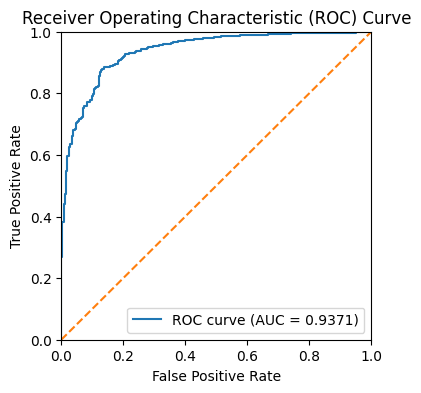

In [5]:
# plot ROC 
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc)
ax.plot([0, 1], [0, 1], linestyle='--')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend()
fig.savefig(path_model+'ROC.png', dpi=300, bbox_inches='tight')



In [7]:
from sklearn.metrics import recall_score

def compute_recall_and_miss_rate(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    
    miss_rate = 1 - recall
    
    return recall, miss_rate

from sklearn.metrics import confusion_matrix

def compute_specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    specificity = tn / (tn + fp)
    
    return specificity

labels = AUC_df.fraction_of_yes.values.round(0).astype(int)
preds = AUC_df.preds.values.round(0).astype(int)

recall, miss_rate = compute_recall_and_miss_rate(labels, preds)
specificity = compute_specificity(labels, preds)
print(f"Specificity: {specificity:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Miss Rate: {miss_rate:.2f}")

Specificity: 0.88
Recall: 0.84
Miss Rate: 0.16
